<a target="_blank" href="https://colab.research.google.com/github/ntu-dl-bootcamp/deep-learning-2026/blob/main/SESSION2/session2_part2.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Datasets and DataLoaders in PyTorch

| Component      | Purpose                                                                 | Think of it as...                                   |
|----------------|-------------------------------------------------------------------------|-----------------------------------------------------|
| **Dataset**     | Stores the data and labels, and knows how to return **one sample**      | A **bookshelf** full of data                        |
| **DataLoader**  | Efficiently provides the data to the model in **mini-batches**, optionally **shuffled** | A **librarian** handing small stacks of books to you |

When training a deep learning model, we typically work with many samples (e.g., thousands of images). We do **not** feed all samples to the model at once. Instead, we train using **mini-batches** (small groups of samples per step).

PyTorch provides many ready-to-use datasets:

- **Image:** https://pytorch.org/vision/stable/datasets.html  
- **Text:** https://pytorch.org/text/stable/datasets.html  
- **Audio:** https://pytorch.org/audio/stable/datasets.html

> 🚩 Question:</strong> Why don't we feed all the samples to the model at once?

## Loading a Dataset

The **MNIST** (Modified National Institute of Standards and Technology) dataset is a classic benchmark dataset of handwritten digits used widely in machine learning and deep learning.

Each image in the dataset is:

- **28 × 28** pixels (grayscale)
- **Labeled** with a digit **0–9**
- Part of a collection of **70,000 images**  
  - **60,000** for training  
  - **10,000** for testing  

Because the images are small and simple, MNIST is ideal for learning the basics of building and training neural networks.

We will load MNIST using `torchvision.datasets`.

More details here: https://en.wikipedia.org/wiki/MNIST_database


> What does a PyTorch Dataset contain?
>
> - The **input samples** (in this case, images of digits)
> - The corresponding **labels** (which digit each image represents)
> - A method to retrieve a **single** example at a time:  


In [ ]:
# Import the necessary modules from torchvision
from torchvision import datasets  # for accessing popular datasets
from torchvision.transforms import ToTensor  # for converting images to PyTorch tensors

# Download and prepare the training data
training_data = datasets.MNIST(
    root="data",  # 'root' is the directory where the dataset will be stored
    train=True,  # 'train=True' specifies that we want the training set
    download=True,  # 'download=True' will download the dataset if it's not already present
    transform=ToTensor(),  # 'transform=ToTensor()' converts the images to PyTorch tensors (needed for PyTorch models)
)

# Download and prepare the test data
test_data = datasets.MNIST(
    root="data",  # Store the test data in the same directory as training data
    train=False,  # 'train=False' specifies that we want the test set
    download=True,  # 'download=True' will download the test dataset if it's not already present
    transform=ToTensor(),  # Convert test images to tensors, just like the training data
)

# Explanation:
# - datasets.MNIST() provides access to the MNIST dataset, with options to load either training or test data.
# - ToTensor() transforms each image from a PIL image format (used by default) to a PyTorch tensor.
# - The 'root' parameter specifies where the data should be saved on your system.

In [ ]:
print("Number of samples in training data ", len(training_data))
print("Number of samples in test data ", len(test_data))

Number of samples in training data  60000
Number of samples in test data  10000


In [ ]:
# Import the necessary module for plotting images
import matplotlib.pyplot as plt  # 'matplotlib.pyplot' is a library for creating visualizations in Python

# Access the 10th image and its label from the training dataset
image, label = training_data[
    10
]  # 'training_data[10]' retrieves the 9th image and its label from the dataset

# Print the shape of the image tensor
print(
    f"Image shape before np.squeeze: {image.shape}"
)  # dimensions of the image tensor before any modifications

# Remove the single color channel dimension from the image tensor
image = (
    image.squeeze()
)  # 'squeeze()' removes extra dimensions of size 1 (from [1, 28, 28] to [28, 28])

# Print the shape of the image tensor after squeezing
print(f"Image shape before np.squeeze: {image.shape}")

Image shape before np.squeeze: torch.Size([1, 28, 28])
Image shape before np.squeeze: torch.Size([28, 28])


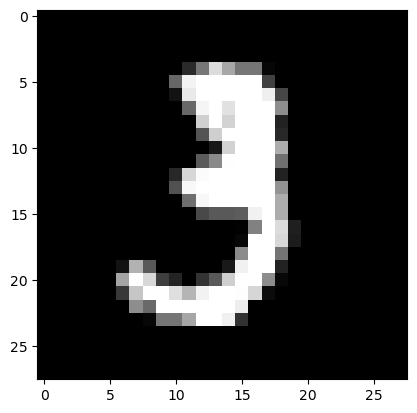

Label: 3


In [ ]:
# Display the image using matplotlib
plt.imshow(image, cmap="gray")  # 'cmap='gray'' shows it in grayscale
plt.show()
print(f"Label: {label}")

# TODO: Try to visualise a different sample from the dataset

> 🚩 TODO Try to visualise a different sample from the dataset

## Preparing Your Data for Use in a Model Using DataLoaders

The `Dataset` we created above gives us **one sample at a time**.  
But when training a neural network, we usually don't feed samples one-by-one. Instead, we want to:

1. **Group samples into mini-batches** (so the model sees several examples at once)
2. **Shuffle** the samples (more on this later)
3. **Load data efficiently**, possibly using multiple CPU cores

A **DataLoader** is an _iterable_ that takes a `Dataset` and handles all of this automatically. It prepares mini-batches for us, shuffles when needed, and can speed up data loading.

In [ ]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

We have loaded our dataset into a `DataLoader`, which allows us to iterate through the data in **batches**. Each iteration returns a batch of `train_features` and `train_labels`.

If `shuffle=True` was set in the `DataLoader`, then the order of the data will **be shuffled the next time we iterate over it**.

In [ ]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


> 🚩 Question
>
> The feature batch has shape torch.Size([64, 1, 28, 28]) and the label batch has shape torch.Size([64]).
>
> What does each dimension in these shapes represent in the context of the MNIST dataset?

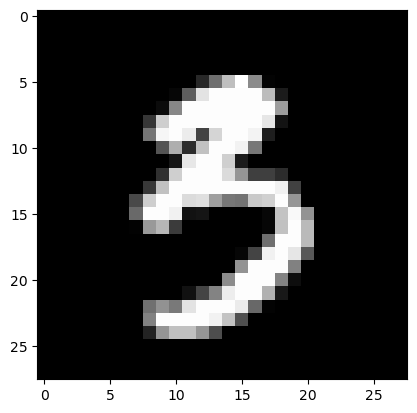

Label: 3


In [ ]:
# Visualising one image from the selected batch

img = train_features[10].squeeze()
label = train_labels[10]

plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# TODO: Try to visualize a different sample from this batch

> 🚩 TODO Try to visualise a different sample from this batch

# Build the Neural Network

A **neural network** is made up of layers that transform the input data step by step.  

PyTorch provides these layers and building blocks inside the `torch.nn` module.

In PyTorch, every neural network component is written as a **class** that inherits from `nn.Module`.  
This includes:

- Individual layers (e.g., `nn.Linear`, `nn.Conv2d`)
- Activation functions (e.g., `nn.ReLU`)
- Even entire neural networks

A neural network is therefore just a **module made up of other modules**.  
This **nested structure** makes it easy to build simple or very complex models by combining layers like building blocks.

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [ ]:
# check if GPU is availble
print(torch.cuda.is_available())

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

False
Using cpu device


> 🚩 Note:
> If your output shows <em>"Using cpu device"</em>, your notebook is currently running on the CPU.  
> To speed up training, switch to a GPU.
>
> **In Google Colab:**
> 1. Go to **Runtime** → **Change runtime type**
> 2. Set **Hardware accelerator** to **T4 GPU**
> 3. Save and wait for Colab to restart
> 4. Re-run all previous cells before continuing

Next, we define our model by creating a Python class that subclasses `nn.Module`.

- In the `__init__` method, we **set up the layers** (the building blocks of the network).
- In the `forward` method, we **describe how the input data flows through those layers**.

In other words:

`__init__` = *what components the network has*

`forward` = *how those components are used to compute the output*

In [ ]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [ ]:
# Create an object of the model class and move that object to the `device` we
# defined earlier
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


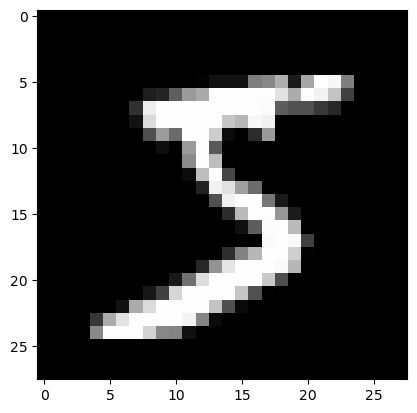

Label: 5

Logits: tensor([[ 0.0305, -0.0279, -0.0534, -0.0075,  0.0100, -0.0198, -0.0334,  0.0130,
          0.0570, -0.0216]], grad_fn=<AddmmBackward0>)

Predicted probabilities: tensor([[0.1036, 0.0977, 0.0953, 0.0997, 0.1015, 0.0985, 0.0972, 0.1018, 0.1064,
         0.0983]], grad_fn=<SoftmaxBackward0>)

Predicted class: tensor([8])


In [ ]:
# Take one sample from the dataset
img, label = training_data[0]

# Visualize the image
plt.imshow(img.squeeze(), cmap="gray")
plt.show()
print(f"Label: {label}\n")

# Move the image to the same device as the model (CPU or GPU)
img = img.to(device)

# Run the image through the model (forward pass)
logits = model(img)
print(f"Logits: {logits}\n")  # Raw, unnormalized class scores

# Convert logits to probabilities
predicted_probabilities = nn.Softmax(dim=1)(logits)
print(f"Predicted probabilities: {predicted_probabilities}\n")

# Pick the class with the highest probability
predicted_class = torch.argmax(predicted_probabilities, dim=1)
print(f"Predicted class: {predicted_class}")

# TODO: Try with another image

## What happens to the input at each layer in the network?

To understand how data flows through our model, let's take a small **mini-batch** of 3 random images (each 28 × 28) and pass them through the network layer by layer.

This will help us see **how the shape of the data changes** at each step.

Our model architecture:
```
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
```

In [ ]:
# Create a minibatch containing 3 random images of size 28 x 28
input_minibatch = torch.rand(3, 28, 28)
print(input_minibatch.size())

torch.Size([3, 28, 28])


### nn.Flatten

The `nn.Flatten` layer reshapes each image from a 2D grid into a 1D vector so that it can be passed into a fully-connected (linear) layer.

In our case, each MNIST image has shape 1 × 28 × 28 (channel, height, width).

`nn.Flatten` transforms this into a 784-dimensional vector (since 28 × 28 = 784), while keeping the batch size unchanged.

In [ ]:
flatten = nn.Flatten()  # initialise the flatten module
flat_image = flatten(
    input_minibatch
)  # pass the input minibatch through the initialised module
print(flat_image.size())

torch.Size([3, 784])


### nn.Linear

`nn.Linear` represents a fully-connected layer. It takes an input vector and computes an output by multiplying it with a weight matrix and then adding a bias.

In other words, it performs the transformation:
$\text{output} = W \cdot \text{input} + b$

This allows the model to learn how different input features contribute to the prediction.

In [ ]:
layer1 = nn.Linear(in_features=28 * 28, out_features=512)  # initialise the linear layer
hidden1 = layer1(
    flat_image
)  # pass the output from previous flatten layer through the linear layer
print(hidden1.size())

torch.Size([3, 512])


## nn.ReLU

Activation functions add non-linearity to the model, which allows neural networks
to learn complex patterns. If we only stacked linear layers, the entire model
would still behave like a single linear transformation. Adding non-linear
activations between layers is what enables deep networks to model richer
relationships.

`nn.ReLU` (Rectified Linear Unit) sets all negative values to zero and keeps the
positive values unchanged. It is simple efficient, and widely used in modern
neural networks.

There are other activation functions such as `nn.Sigmoid` and `nn.Tanh`, but
ReLU is often preferred because it trains faster and reduces gradient issues
in deep models.

Read more: [nn.ReLU](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html), [nn.Sigmoid](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html), [nn.Tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html)

In [ ]:
print(f"Before ReLU: {hidden1}\n\n")
relu = nn.ReLU()
hidden1 = relu(hidden1)
print(f"After ReLU: {hidden1}")

# TODO:

Before ReLU: tensor([[-0.4467,  0.3716, -0.0653,  ..., -0.1323,  0.0938, -0.3887],
        [-0.2968,  0.4073,  0.3237,  ..., -0.4469,  0.2218, -0.0182],
        [-0.1222,  0.4878, -0.1759,  ...,  0.1510, -0.0372, -0.3054]],
       grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0000, 0.3716, 0.0000,  ..., 0.0000, 0.0938, 0.0000],
        [0.0000, 0.4073, 0.3237,  ..., 0.0000, 0.2218, 0.0000],
        [0.0000, 0.4878, 0.0000,  ..., 0.1510, 0.0000, 0.0000]],
       grad_fn=<ReluBackward0>)


> 🚩 Note:
> Notice what happened to the negative values in the input before they are passed through ReLU

## nn.Sequential

`nn.Sequential` is an **ordered** container that lets you combine multiple layers
into a single module. When an input is passed to a `Sequential` block, it flows
through each layer in the exact order they are listed.

This is useful for defining simple feed-forward architectures, where the computation
happens step-by-step without branching. It allows you to treat several layers
as one logical **building block** in your model.

In [ ]:
block1 = nn.Sequential(
    nn.Flatten(),
    nn.Linear(28 * 28, 512),
    nn.ReLU(),
    nn.Linear(512, 512),
    nn.ReLU(),
    nn.Linear(512, 10),
)

input_image = torch.rand(3, 28, 28)
print(f"Input mini batch: {input_image.size()}")
logits = block1(input_image)
print(f"Logits: {logits.size()}")

Input mini batch: torch.Size([3, 28, 28])
Logits: torch.Size([3, 10])


## nn.Softmax

The last linear layer of the neural network returns **logits** - raw, unnormalised
scores that can take any real value. To convert these logits into class
probabilities, we apply the `nn.Softmax` function.

Softmax exponentiates and normalises the logits so that:
- All output values are in the range [0, 1]
- The values across the chosen dimension sum to 1

This produces a probability distribution over the classes.

`dim` parameter indicates the axis along which the values should sum to 1.

Formula:

$\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_j e^{z_j}}$

In [ ]:
softmax = nn.Softmax(dim=1)
pred_probabilities = softmax(logits)
print(f"Logits\n{logits}\n")
print(f"Predicted probabilities\n{pred_probabilities}")

Logits
tensor([[ 0.1158,  0.0854, -0.0111, -0.0192, -0.0277, -0.0834,  0.1213, -0.0784,
          0.0113,  0.0433],
        [ 0.1160,  0.1056, -0.0340, -0.0456,  0.0165, -0.0487,  0.1287, -0.0812,
         -0.0214,  0.0758],
        [ 0.0590,  0.1116, -0.0227, -0.0497,  0.0158, -0.0489,  0.1014, -0.0754,
          0.0061,  0.0624]], grad_fn=<AddmmBackward0>)

Predicted probabilities
tensor([[0.1102, 0.1070, 0.0971, 0.0963, 0.0955, 0.0903, 0.1109, 0.0908, 0.0993,
         0.1025],
        [0.1096, 0.1085, 0.0944, 0.0933, 0.0993, 0.0930, 0.1110, 0.0900, 0.0956,
         0.1053],
        [0.1042, 0.1098, 0.0960, 0.0935, 0.0998, 0.0935, 0.1087, 0.0911, 0.0988,
         0.1046]], grad_fn=<SoftmaxBackward0>)


## 🚩 Mini Challenge

<p align="center">
  <img src="https://github.com/ntu-dl-bootcamp/deep-learning-2026/raw/main/SESSION2/mini-challenge-session-2.png" width="600">
</p>

**Your Task:**

1. Implement the neural network architecture shown in the image (using `nn.Module` in PyTorch).
2. Train the network using reasonable hyperparameters (e.g., learning rate, batch size, number of epochs).
3. Compare its performance (accuracy/loss) with the previous model you built.

## Model parameters

Many layers inside a neural network are parameterised. This means that they have associated weights and biases that are optimised during training.

`nn.Module` tracks all the parameters inside a model object. This can be accessed using the model's `parameters()` and `named_parameters()` methods.

In [ ]:
print(f"Model structure: {model}\n\n")

Model structure: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)




This loop helps us inspect the parameters (weights and biases) of the model.

In [ ]:
for name, param in model.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param[:2]} \n")

Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values : tensor([[ 0.0139,  0.0010, -0.0079,  ...,  0.0062, -0.0283,  0.0108],
        [ 0.0335, -0.0023,  0.0084,  ...,  0.0076, -0.0058,  0.0256]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values : tensor([0.0091, 0.0048], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values : tensor([[-0.0146,  0.0197,  0.0340,  ...,  0.0316,  0.0099, -0.0024],
        [ 0.0269, -0.0011,  0.0323,  ...,  0.0420, -0.0004, -0.0161]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Size: torch.Size([512]) | Values : tensor([-0.0152,  0.0300], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.4.weight | Size: torch.Size([10, 512]) | Values : tensor([[ 0.0379,  0.0009, -0.0070,  ..., -0.0011, -0.0324,  0.0129],
        [-0.0106, -0.0433, -0.0271,  ...,  0.0148, -0.0076, -0.0410]],
       grad_fn=<SliceBackward0>) 


# Optimizing the Model's Parameters

Once we have a model and data, the next step is to **train** the model by adjusting its parameters so that its predictions improve.

Training is an **iterative** process. In each iteration:

1. The model **makes a prediction**.
2. We **measure the error** using a **loss function**.
3. We compute how the error **changes with respect to each parameter** (this is done automatically by PyTorch using **backpropagation**).
4. We **update the parameters** to reduce the error (using **gradient descent** or a variant of it).

## Hyperparameters

**Hyperparameters** are settings that control how the training process behaves.  
They are **not** learned by the model — we choose them manually.

Key hyperparameters we will use:

1. **Number of epochs**  
   How many times we go through the entire training dataset.

2. **Batch size**  
   How many samples the model sees **before** the parameters are updated.

3. **Learning rate**  
   How big the parameter update step is during optimization.

Choosing good hyperparameters is important for effective learning and stable convergence.


> 🚩 Question:
>
> How might changing the learning rate affect the training process?

In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

## Optimisation loop
Using these hyperparamters, we can train and optimise the paramters of our model with an optimisation loop. Each iteration of the optimisation loop is called as an **epoch**.

Each epoch has two parts
1. Iterate over the training loop and update the parameters
2. Iterate over the test / validation loop and check if the model's performance is improving.

Two important concepts used in the training loop are the loss function and the optimizer.

# Loss Function

When our network is first initialized, its predictions will usually be incorrect.  
A **loss function** tells us *how far off* the model’s predictions are from the true labels.  
During training, we aim to **minimize this loss**.

To compute the loss:
1. The model makes a **prediction** from the input.
2. The prediction is **compared with the true label**.
3. The loss function outputs a **single number** representing the error.

### Common Loss Functions

| Loss Function | Use Case | Notes |
|--------------|----------|-------|
| **`nn.MSELoss`** | Regression tasks | Measures squared difference between prediction and target. |
| **`nn.NLLLoss`** | Classification | Works with log-probabilities. |
| **`nn.CrossEntropyLoss`** | Classification | Combines `LogSoftmax` + `NLLLoss`. Works directly on raw logits. |

We will use **`nn.CrossEntropyLoss`**, which:
- Takes the model’s raw outputs (**logits**),
- Applies the appropriate normalization internally,
- Computes how wrong the prediction is.

This makes it well-suited for multi-class classification problems like MNIST.

In [ ]:
# initialise the loss function
loss_fn = nn.CrossEntropyLoss()

## Optimizer

**Optimization** is the process of adjusting the model’s parameters so that the loss decreases over time.

An **optimizer** defines *how* these parameter updates are performed.

In our example, we use **Stochastic Gradient Descent (SGD)**, but PyTorch provides many others such as **Adam** and **RMSProp**, which may work better depending on the task.

To create an optimizer, we:
1. **Pass in the model’s parameters** (so the optimizer knows what to update)
2. Set the **learning rate** (to control how big each update step is)

Once defined, the optimizer will handle the parameter updates during training.

In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

### Inside the training loop
The optimizer updates the model parameters in **three steps**:

1. **Reset the gradients**

    Gradients accumulate by default in PyTorch. We reset them each iteration to avoid carrying over values from the previous update

    ```python
    optimizer.zero_grad()
    ```

2. **Backpropagate the loss**

    This computes how the loss changes with respect to each model parameter and stores the gradients.

    ```python
    loss.backward()
    ```

3. **Update the parameters**

    The optimizer adjusts the parameters using the computed gradients (e.g., gradient descent).

    ```python
    optimizer.step()
    ```

## Full training loop

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    # set the model to training mode
    model.train()

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute the prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

## Full testing loop

In [ ]:
def test_loop(dataloader, model, loss_fn):
    # Set the model to evaluation mode - important for batch normalisation and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.inference_mode():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(
        f"Test Error: \n Accuracy: {(100 * correct):>0.1f}%, Avg loss: {test_loss:>8f} \n"
    )

We initialize the loss function and optimizer, and pass it to train_loop and test_loop. Feel free to increase the number of epochs to track the model’s improving performance.

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t + 1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.303277  [   64/60000]
loss: 2.293615  [ 6464/60000]
loss: 2.285565  [12864/60000]
loss: 2.287923  [19264/60000]
loss: 2.279940  [25664/60000]
loss: 2.271917  [32064/60000]
loss: 2.268837  [38464/60000]
loss: 2.261481  [44864/60000]
loss: 2.263944  [51264/60000]
loss: 2.250340  [57664/60000]
Test Error: 
 Accuracy: 49.2%, Avg loss: 2.250931 

Epoch 2
-------------------------------
loss: 2.256545  [   64/60000]
loss: 2.240735  [ 6464/60000]
loss: 2.242689  [12864/60000]
loss: 2.239058  [19264/60000]
loss: 2.236401  [25664/60000]
loss: 2.214482  [32064/60000]
loss: 2.206645  [38464/60000]
loss: 2.208053  [44864/60000]
loss: 2.207768  [51264/60000]
loss: 2.185170  [57664/60000]
Test Error: 
 Accuracy: 65.8%, Avg loss: 2.177637 

Epoch 3
-------------------------------
loss: 2.214422  [   64/60000]
loss: 2.154977  [ 6464/60000]
loss: 2.166575  [12864/60000]
loss: 2.128053  [19264/60000]
loss: 2.117818  [25664/60000]
loss: 2.115278  [32064/600

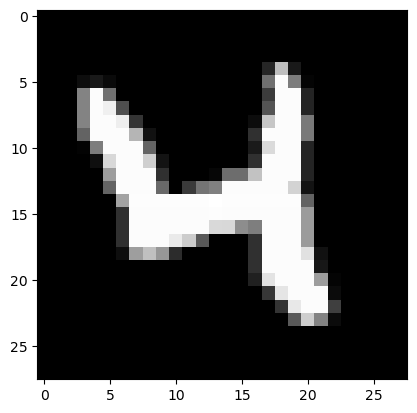

Label: 4

Predicted class: tensor([4])


In [ ]:
img, label = training_data[20]

plt.imshow(img.squeeze(), cmap="gray")
plt.show()
print(f"Label: {label}\n")

img = img.to(device)
logits = model(img)
predicted_probabilities = nn.Softmax(dim=1)(logits)
predicted_class = torch.argmax(predicted_probabilities, dim=1)
print(f"Predicted class: {predicted_class}")

# Save and load the model

PyTorch models store the learned parameters in an internal state dictionary, called state_dict. **These can be saved using the torch.save method.**

In [ ]:
torch.save(model.state_dict(), "model_weights.pth")

To load model weights, you need to create an instance of the same model first, and then load the parameters using `load_state_dict()` method.

In [ ]:
model_new = NeuralNetwork().to(device)

model_new.load_state_dict(torch.load("model_weights.pth"))

<All keys matched successfully>

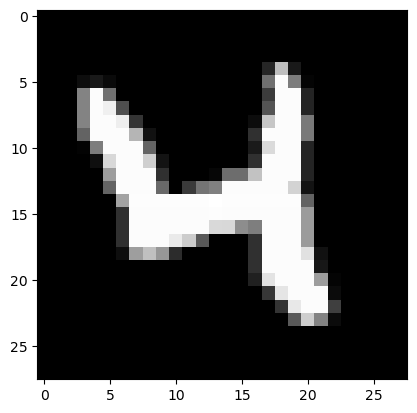

Label: 4

Predicted class: tensor([4])


In [ ]:
# Testing the newly loaded model, `model_new`

img, label = training_data[20]

plt.imshow(img.squeeze(), cmap="gray")
plt.show()
print(f"Label: {label}\n")

img = img.to(device)
logits = model_new(img)
predicted_probabilities = nn.Softmax(dim=1)(logits)
predicted_class = torch.argmax(predicted_probabilities, dim=1)
print(f"Predicted class: {predicted_class}")

# Recommended Reading and Other Resources
1. [What is torch.nn really?](https://pytorch.org/tutorials/beginner/nn_tutorial.html)
2. [PyTorch Beginner Series](https://www.youtube.com/playlist?list=PL_lsbAsL_o2CTlGHgMxNrKhzP97BaG9ZN)

This notebook is based on [Learn the Basics](https://pytorch.org/tutorials/beginner/basics/intro.html)